In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as torch_data

In [2]:
train_data = torch_data.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
validation_data = torch_data.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [3]:
import matplotlib.pyplot as plt
import numpy as np

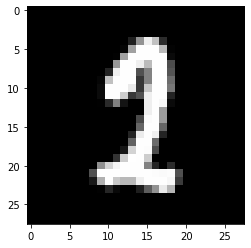

This is a 2


In [4]:
r_ix = np.random.randint(0, len(train_data) - 1)

plt.imshow(train_data[r_ix][0][0], cmap="gray")
plt.show()
print(f"This is a {train_data[r_ix][1]}")

In [5]:
# define model properties
class SoftMax(nn.Module):
    def __init__(self, in_size, out_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        return self.linear(x)

In [6]:
input_dim = 28 * 28
output_dim = 10

model = SoftMax(input_dim, output_dim)

In [7]:
print("W:", list(model.parameters())[0].size())
print("b:", list(model.parameters())[1].size())

W: torch.Size([10, 784])
b: torch.Size([10])


In [8]:
# initially all of these weight matrices look like noise

C:\Development\Anaconda3\lib\site-packages\torch\_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


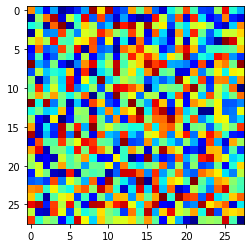

In [9]:
W1 = list(model.parameters())[0][0].resize(28, 28)
plt.imshow(W1.detach().numpy(), cmap="jet")
plt.show()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [11]:
print(len(train_data))
print(len(validation_data))

60000
10000


In [12]:
train_loader = DataLoader(dataset=train_data, batch_size=128)
validation_loader = DataLoader(dataset=validation_data, batch_size=5000)

In [13]:
# train the model
n_epochs = 10
accuracy_list = []
loss_list = []

for epoch in range(n_epochs):
    # train on training set
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x.view(-1, 28 * 28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
    loss_list.append(loss.item())
    print(f"Train epoch {epoch} done:\n\tloss = {loss.item()}")

    # evaluate
    correct = 0
    for x_test, y_test in validation_loader:
        z = model(x_test.view(-1, 28 * 28))
        _, y_hat = torch.max(z.data, 1)
        correct = correct + (y_hat == y_test).sum().item()
    accuracy = correct / len(validation_data)
    print(f"Evaluation done:\n\tval_accuracy = {accuracy}\n#####################")
    accuracy_list.append(accuracy)



Train epoch done:
	loss = 0.3654876947402954
Evaluation done:
	val_accuracy = 0.9076
#####################
Train epoch done:
	loss = 0.32772961258888245
Evaluation done:
	val_accuracy = 0.9101
#####################
Train epoch done:
	loss = 0.30630946159362793
Evaluation done:
	val_accuracy = 0.9105
#####################
Train epoch done:
	loss = 0.2914695143699646
Evaluation done:
	val_accuracy = 0.9106
#####################
Train epoch done:
	loss = 0.2801346182823181
Evaluation done:
	val_accuracy = 0.9099
#####################
Train epoch done:
	loss = 0.27097269892692566
Evaluation done:
	val_accuracy = 0.9093
#####################
Train epoch done:
	loss = 0.26331260800361633
Evaluation done:
	val_accuracy = 0.9089
#####################
Train epoch done:
	loss = 0.256755530834198
Evaluation done:
	val_accuracy = 0.9085
#####################
Train epoch done:
	loss = 0.25102728605270386
Evaluation done:
	val_accuracy = 0.9077
#####################
Train epoch done:
	loss = 0.24593

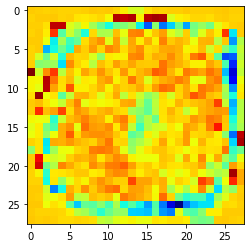

In [19]:
# lets see what the weights look like now
W1 = list(model.parameters())[0][0].resize(28, 28)
plt.imshow(W1.detach().numpy(), cmap="jet")
plt.show()